# Frequently utilized function

`plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)`:

`plt.ylim()\ plt.xlim()`:

`plt.xlabel()\ plt.ylabel()`:

`plt.legend(["Class 0", "Class 1"], loc=4)`:

Adds a legend showing which marker/color represents each class. loc=4 means "bottom-right" of the plot.

`(cancer.target_names, np.bincount(cancer.target))`:


`plt.matshow()`:


`plt.yticks/xticks()`:

`plt.colorbar()`:

`.set_title()`:

`axes.ravel()`:


`fig.tight_layout()`:

# General

Datasets that are included in scikit-learn are usually stored as
 ***Bunch*** objects, which contain some information about the dataset
 as well as the actual data. They behave like dictionaries, with the added benefit that you
 can access values using a dot (`bunch.key` instead of
 `bunch['key']`).

By accessing the DESCR attribute of datasets, we can get more information.

# Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import mglearn
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import load_boston

# A. Supervised machine learning algorithms(30-39)

<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
C:\Users\MDastranj\AppData\Local\Temp\ipykernel_5536\2282180916.py:27: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


X.shape: (26, 2)
cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)
Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Data shape: (506,)
X.shape: (506, 104)
Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


C:\Users\MDastranj\AppData\Local\Temp\ipykernel_5536\2282180916.py:27: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

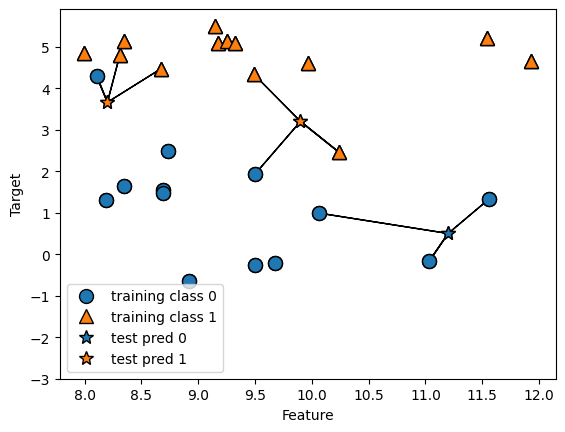

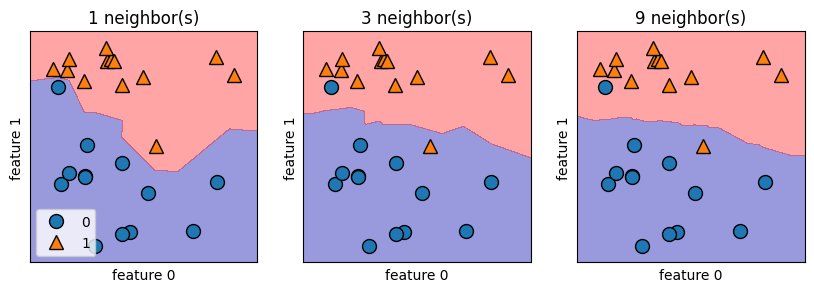

In [3]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
 
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
 
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
 
print("Shape of cancer data: {}".format(cancer.data.shape))
  
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
   
print("Feature names:\n{}".format(cancer.feature_names))

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston = raw_df.values[1::2, 2]
# boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))
mglearn.plots.plot_knn_classification(n_neighbors=1)
mglearn.plots.plot_knn_classification(n_neighbors=3)

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
   
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
 # the fit method returns the object self, so we can instantiate
 # and fit in one line
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{} neighbor(s)".format(n_neighbors))
 ax.set_xlabel("feature 0")
 ax.set_ylabel("feature 1")
axes[0].legend(loc=3)   
 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
 plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

`X, y = mglearn.datasets.make_forge()`:

It is a function from the `mglearn.datasets `module that:
   - Creates a small, synthetic (fake) classification dataset.
   - This dataset is designed specifically for learning and testing classifiers.
   - It only has 26 samples and 2 features, so it’s easy to plot and visualize in 2D.

X → a 2D NumPy array of shape (26, 2)
- Each row is a sample (data point) & Each column is a feature (like "height" and "weight").

y → a 1D NumPy array of shape (26,)
- Contains labels (targets) for each sample. The values are 0 or 1, represents two classes.

`mglearn.discrete_scatter(X[:, 0], X[:, 1], y)`

`X[:, 0]` and `X[:, 1]` represent the first and second features. (rows belong to samples, columns belong to features)

`y` determines the class color/symbol.

`plt.legend(["Class 0", "Class 1"], loc=4)`

Adds a legend to distinguish the two classes. `loc=4` places the legend in the lower right.

`X, y = mglearn.datasets.make_wave(n_samples=40)`

Creates a new toy dataset — this one is for regression. It has a single input and a continuous target variable (response).
   - 40 samples, 1 feature each
   - y is continuous (not a class)

We are using a low dimensional dataset because it's easier to visualize.
*Any intuition derived from datasets with few features (low-dimensional datasets) might not hold in datasets with many features (high
dimensional datasets)*

`cancer = load_breast_cancer()`

Loads a real dataset: breast cancer diagnosis

   - 569 samples
   - 30 features
   - Target: 0 = malignant, 1 = benign
 
`print("Shape of cancer data: {}".format(cancer.data.shape))`:

Prints shape of the data matrix.

cancer is not a NumPy array, but rather a **Bunch** object, which is like a dictionary, returned by `sklearn.datasets.load_breast_cancer()`.
  
`print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))`:

Counts how many malignant and benign samples there are.
   - np.bincount(cancer.target) counts how many 0s and 1s there are.
   - zip matches(maps) the count to the name (malignant, benign)

`boston = load_boston()`:

A real-world regression dataset, the Boston Housing dataset. The task is to predict the median price of homes using information such as crime rate, proximity to the Charles River, highway accessibility, ect in several Boston neighborhoods in the 70s.
The dataset contains 506 data points, each with 13 features.
This one is also a `Bunch` as well.

- This dataset seems to have become unavailable thus there is an alternative code available in the code cell above.

`X, y = mglearn.datasets.load_extended_boston()`

Loads an extended version of the Boston dataset.Adds polynomial and interaction features → more complex. In this expanded version, products(interactions) of features are also considered (13 choose 2).
- *Utilizing these derived features is called Feature engineering*

`mglearn.plots.plot_knn_classification(n_neighbors=1)`:

KNN is the simplest ML algorithm which consists only of *storing the training dataset*. This Plots KNN decision boundaries for k=1.


`X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)`

Splits into training and testing sets.

`clf = KNeighborsClassifier()`:

`clf.fit(X_train, y_train)`:

Creates a KNN classifier with k=3 and trains it on the training set.

`print("Test set predictions: {}".format(clf.predict(X_test)))`:

`print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))`:

It simply predicts and prints test labels and Computes and prints test accuracy.

- To evaluate how well our model generalizes, we use `.score()`.
   
`fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes)`:

For n_neighbors = 1: Decision boundary is sharper, The model generalizes less and the model is the most complex.
For n_neighbors = number of data points: Decision boundary is the smoothest, Generalizes the best, the model is the simplest.

`clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)`:

Trains the KNN model for each value of k.

`mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)`:

This line plots the decision boundary of the trained classifier clf in a 2D feature space.

`clf`: The trained classifier (e.g., a KNeighborsClassifier).

`X`: The feature data used to define the range of values for plotting. Should have two features (for 2D).

`fill=True`: Fills the background color of regions assigned to each class (helps visualize class regions).

`eps=0.5`: Controls the padding/margin around the data in the plot. Higher eps = more space around the edge.

`ax=ax`: Specifies which subplot/axes to draw on. Useful when you're plotting multiple classifiers side by side.

`alpha=.4`: Sets the transparency of the background color fill (0 = fully transparent, 1 = fully opaque).

`mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)`:

Unlike a normal scatter plot, `discrete_scatter()`:

Automatically gives different colors/markers to each class and makes class separation easier to see visually.

- `plt.plot()` is meant for continuous lines or curves, while
`scatter()` is meant for plotting individual points.

`axes[0].legend(loc=3)`:

Adds a legend to the first subplot (bottom-left)   

`X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)`

`stratify=cancer.target` ensures that the class proportions (malignant/benign) are preserved in both training and test sets. This is critical when the dataset is imbalanced (unequal class counts), so the model isn’t biased.

`neighbors_settings = range(1, 11)`:

Prepares to test k=1 to k=10.

`for n_neighbors in neighbors_settings:`:

 `clf = KNeighborsClassifier(n_neighbors=n_neighbors)`

 `clf.fit(X_train, y_train)`:
 
 `training_accuracy.append(clf.score(X_train, y_train))`:
 
 `test_accuracy.append(clf.score(X_test, y_test))`:
 
Trains and evaluates the model for each k.
 
- Real-world plots are rarely very smooth.
- The test set accuracy for using a single neighbor is lower than when using more neighbors.
- When considering neighbors as the number of data points, the model becomes too simple and the accuracy becomes worse.
- The best performance is somewhere in the middle. Still, it is good to keep the scale of the plot in mind.

# B. Principal Component Analysis (PCA)(141-155)

In [ ]:
mglearn.plots.plot_pca_illustration()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
 _, bins = np.histogram(cancer.data[:, i], bins=50)
 ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
 ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
 ax[i].set_title(cancer.feature_names[i])
 ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 ax.set_title(people.target_names[target])
 
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
 print("{0:25} {1:3}".format(name, count), end='   ')
 if (i + 1) % 3 == 0: print()
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))
mglearn.plots.plot_pca_whitening()
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))
print("pca.components_.shape: {}".format(pca.components_.shape))
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),
cmap='viridis')
 ax.set_title("{}. component".format((i + 1)))
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

PCA rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

The algorithm proceeds by first finding the direction of maximum variance. This is the direction (or vector) in the data that contains most of the information, or in other words, the direction along which the features are most correlated with each other. Then, the algorithm finds the direction that contains the most information while being orthogonal (at a right angle) to the first direction. In two dimensions, there is only one possible orientation that is at a right angle, but in higher-dimensional spaces there would be (infinitely) many orthogonal directions.

In general, if number of data points < features, we can have as many PCAs as data points, otherwise we can have as many PCAs as the number of features.

Before the rotation, the mean was subtracted from the data, so that the transformed data is centered around zero. In the rotated representation found by PCA, the two axes are uncorrelated, meaning that the correlation matrix of the data in this representation is zero except for the diagonal.

- PCA is sometimes used to remove noise effects from the data or visualize what part of the information is retained using the principal components.
- PCA is an unsupervised method, and does not use any class information when finding the rotation. It simply looks at the correlations in the data.

`mglearn.plots.plot_pca_illustration()`:


`fig, axes = plt.subplots(15, 2, figsize=(10, 20))`

`malignant = cancer.data[cancer.target == 0]`

`benign = cancer.data[cancer.target == 1]`


`for i in range(30):`

we create a histogram for each of the features, counting how often a data point appears with a feature in a certain range (called a bin). This gives some idea of how each feature is distributed across the two classes, and allows us to venture a guess as to which features are better at distinguishing malignant and benign samples. A feature is informative if distributions are disjoint and don't overlap.

*These plot doesn't show us anything about the interactions between variables and how these relate to the classes.*

 `_, bins = np.histogram(cancer.data[:, i], bins=50)`
 
 `ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)`
 
 `ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)`
 
 


`scaler = StandardScaler()`

Scaling data so that each feature has unit variance.

`scaler.fit(cancer.data)`

find the principal components
 by calling the fit method, and then apply the rotation and dimensionality reduction
 by calling transform.By default, PCA only rotates (and shifts) the data, but keeps all principal components.

`X_scaled = scaler.transform(cancer.data)`


`pca = PCA(n_components=2)`

`pca.fit(X_scaled)`

`X_pca = pca.transform(X_scaled)`


`plt.figure(figsize=(8, 8))`

`mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)`

`plt.gca().set_aspect("equal")`

`print("PCA component shape: {}".format(pca.components_.shape))`


`people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)`

`image_shape = people.images[0].shape`

`fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})`

`for target, image, ax in zip(people.target, people.images, axes.ravel()):`

` ax.imshow(image)`
 
 `ax.set_title(people.target_names[target])`
 
 
`print("people.images.shape: {}".format(people.images.shape))`

`print("Number of classes: {}".format(len(people.target_names)))`


`counts = np.bincount(people.target)`

# print counts next to target names
`for i, (count, name) in enumerate(zip(counts, people.target_names)):`

 `print("{0:25} {1:3}".format(name, count), end='   ')`
 
 `if (i + 1) % 3 == 0: print()`
 
`mask = np.zeros(people.target.shape, dtype=np.bool)`

`for target in np.unique(people.target):`

 `mask[np.where(people.target == target)[0][:50]] = 1`
 
`X_people = people.data[mask]`

`y_people = people.target[mask]`


`X_people = X_people / 255.`


`X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)`


`knn = KNeighborsClassifier(n_neighbors=1)`

`knn.fit(X_train, y_train)`

`print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))`

`mglearn.plots.plot_pca_whitening()`:

Whitening option of PCA, rescales the principal components to have the same scale. (same as using StandardScaler after the transformation)
- whitening corresponds to not only rotating the data, but also rescaling it so that the center panel is a circle instead of an ellipse.

`pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)`


`X_train_pca = pca.transform(X_train)`

`X_test_pca = pca.transform(X_test)`

`print("X_train_pca.shape: {}".format(X_train_pca.shape))`

`knn = KNeighborsClassifier(n_neighbors=1)`

`knn.fit(X_train_pca, y_train)`

`print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))`

`print("pca.components_.shape: {}".format(pca.components_.shape))`

`fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})`

`for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):`

 `ax.imshow(component.reshape(image_shape),cmap='viridis')`
 
 `ax.set_title("{}. component".format((i + 1)))`

`mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)`

`mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)`


# C.  Representing Data and Engineering Features(211-219)

In [ ]:
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
data = pd.read_csv("/home/andy/datasets/adult.data", header=None, index_col=False, names=['age', 'workclass', 'fnlwgt', 'education',  'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())
print(data.gender.value_counts())
print("Original features:\n", list(data.columns), "\n") 
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))
data_dummies.head()
features = data_dummies.ix[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)
pd.get_dummies(demo_df)
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

Feature engineering is choosing the perfect way to represent the data for a particular application as it can have a high influence on the performance of a supervised model than the exact parameters we choose.

If the task is to predict whether the person's income is above or under a particular amount, we'll have a classification problem; however if the task is to predict the exact amount of income, then we are going to have a regression problem.

The most common way to represent categorical variables is using the one-hot-encoding or one-out-of-N encoding, also known as dummy variables. We can represent any number of categories by introducing one new feature per category, as described here (A single feature is encoded using four new
features).

Using pandas is slightly easier than scikit-learn.

**We called get_dummies on a DataFrame containing both the training and the test data. This is important to ensure categorical values are represented in the same way in the training set and the test set.**

pandas will create as many features as the ones in the training set, so the encoded Data Frames will have the same number of features.

To fix this, either call get_dummies on a DataFrame that contains both the training and the test data points, or make sure that the column names are the same for the training and test sets after calling get_dummies, to ensure they have the same semantics.

*The get_dummies function in pandas treats all numbers as continuous and will not create dummy variables for them. To get around this, you can either use scikit-learn’s OneHotEncoder, for which you can specify which variables are continuous and which are discrete, or convert numeric columns in the DataFrame to strings.*

***Once we’ve selected the right features, the linear model performs as well as the random forest.***

If you are unsure when selecting what to use as input to your machine learning algorithms, **automatic feature selection** can be quite helpful. In most real-world cases, applying feature selection is unlikely to provide large gains in performance. However, it is still a valuable tool in the toolbox of the feature engineer.

data = pd.read_csv("/home/andy/datasets/adult.data", header=None, index_col=False, names=['age', 'workclass', 'fnlwgt', 'education',  'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
'occupation', 'income']]

display(data.head())

print(data.gender.value_counts())


print("Original features:\n", list(data.columns), "\n") 

data_dummies = pd.get_dummies(data)

print("Features after get_dummies:\n", list(data_dummies.columns))

data_dummies.head()

features = data_dummies.ix[:, 'age':'occupation_ Transport-moving']

- Column indexing in pandas includes the end of the range

X = features.values

y = data_dummies['income_ >50K'].values

print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))



demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})

display(demo_df)

pd.get_dummies(demo_df)

demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)

pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

# D. Automatic Feature Selection(236-241)

In [ ]:
cancer = load_breast_cancer()
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
# transform test data
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
lr.score(X_test_selected, y_test)))
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42),
 threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
 n_features_to_select=40)
select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))
print("Test score: {:.3f}".format(select.score(X_test, y_test)))